In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

# set total number of turbines
cap = 1

# import and rearange data
df_raw = pd.read_excel (r'C:\Users\Azri\anaconda3\Scripts\B3 LEO Modelling\Local Github Repo\SectionCoop\Wind\wind_hourly_power.xlsx')

df_raw['Power (MW)'] = df_raw['Power (kW)'] /1000
df_raw.drop(columns=['Power (kW)'],inplace=True)
df_useful = df_raw.tail(8760)
df_useful.reset_index(inplace=True)
df_useful = df_useful.rename(columns={'# Renewables.ninja Solar PV (Point API) - 51.658': 'Datetime', 'Unnamed: 2': 'Power (MW)'})
df_useful["Power (MW)"] = df_useful["Power (MW)"] * cap

# get hourly power
df_pwr_hourly = df_useful[["Datetime", "Power (MW)"]]      # note: this is also hourly energy (kWh)
#df_pwr_hourly.set_index(pd.to_datetime(df_pwr_hourly['Datetime']))

# get daily energy
df_energy_daily = df_pwr_hourly.groupby(pd.Grouper(key='Datetime', freq='1D')).sum().reset_index()
df_energy_daily = df_energy_daily.rename(columns={'Power (MW)': 'Energy (MWh)'})

# half hourly profiles
df_pwr_halfhourly = df_pwr_hourly.groupby(pd.Grouper(key='Datetime', freq='0.5H')).sum().reset_index()
# initiate convolution vector - this will fill in the gaps left by the groupby
Vcon = [0.5, 1, 0.5]
df_pwr_halfhourly["Power (MW)"] = np.convolve(df_pwr_halfhourly["Power (MW)"], Vcon, mode='same')

# export
df_pwr_halfhourly.to_csv('wind_hh_pwr.csv', index=False)
df_energy_daily.to_csv('wind_d_energy.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'wind_d_energy.csv'

In [ ]:
df_energy_daily.head(50)

In [41]:
df_pwr_hourly

,Datetime,Power (MW)
0,2019-01-01 00:00:00,0.668284
1,2019-01-01 01:00:00,0.625255
2,2019-01-01 02:00:00,0.612877
3,2019-01-01 03:00:00,0.653540
4,2019-01-01 04:00:00,0.630291
...,...,...
8755,2019-12-31 19:00:00,0.663165
8756,2019-12-31 20:00:00,0.675991
8757,2019-12-31 21:00:00,0.606046
8758,2019-12-31 22:00:00,0.539250


In [42]:
df_pwr_halfhourly

,Datetime,Power (MW)
0,2019-01-01 00:00:00,0.668284
1,2019-01-01 00:30:00,0.646769
2,2019-01-01 01:00:00,0.625255
3,2019-01-01 01:30:00,0.619066
4,2019-01-01 02:00:00,0.612877
...,...,...
17514,2019-12-31 21:00:00,0.606046
17515,2019-12-31 21:30:00,0.572648
17516,2019-12-31 22:00:00,0.539250
17517,2019-12-31 22:30:00,0.528716


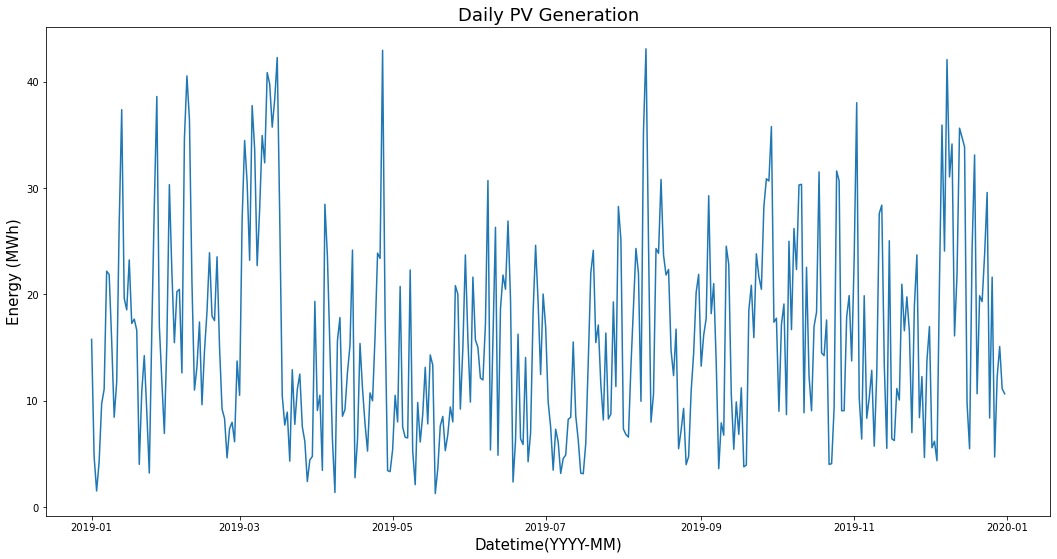

In [43]:
# plot daily energy
plt.figure(figsize=(18,9))
plt.plot(df_energy_daily['Datetime'],df_energy_daily['Energy (MWh)'])
plt.xlabel('Datetime(YYYY-MM)',fontsize=15)
plt.ylabel('Energy (MWh)',fontsize=15)
plt.title('Daily PV Generation',fontsize=18)
plt.show()

In [44]:
# find average daily profile over november and december and average daily profile over june and july

# set new data sets
df_sum = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-06-01 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-08-01 00:00:00'))].reset_index()
df_win = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-11-01 00:00:00')) & (df_pwr_hourly['Datetime'] <= pd.to_datetime('2019-12-31 23:59:59'))].reset_index()

df_sum = df_sum[["Datetime", "Power (MW)"]]
#pd.to_datetime(df_sum_avg.Datetime, format='%Y-%m-%d %H:%M:%S')
#df_sum_avg.set_index('Datetime')
df_win = df_win[["Datetime", "Power (MW)"]]

df_avg_data = [df_sum["Power (MW)"], df_win["Power (MW)"]]
#df_sum_avg = df_sum_avg.groupby(pd.Grouper(key='Datetime', freq='1H')).sum()
#df_sum_avg.groupby([pd.Grouper(key='Datetime', freq='1D'), pd.grouper(key='Datetime', freq'1H).mean()])
#df_sum_avg.groupby([df_sum_avg["Datetime"].dt.year, df_sum_avg["Datetime"].dt.hour]).mean()

#df_avg_days = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-06-01 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-06-02 00:00:00'))].reset_index()
#f_avg_days = df_avg_days[["Datetime"]]
df_avg_days = ['Winter Energy (MWh)', 'Summer Energy (MWh)']

In [45]:
df_sum.head(30)

,Datetime,Power (MW)
0,2019-06-01 00:00:00,0.527499
1,2019-06-01 01:00:00,0.461105
2,2019-06-01 02:00:00,0.392588
3,2019-06-01 03:00:00,0.347399
4,2019-06-01 04:00:00,0.295795
5,2019-06-01 05:00:00,0.177380
6,2019-06-01 06:00:00,0.096903
7,2019-06-01 07:00:00,0.108770
8,2019-06-01 08:00:00,0.189980
9,2019-06-01 09:00:00,0.295773


In [46]:
# max daily energy and date
max_daily = df_energy_daily["Energy (MWh)"].max()
max_daily

df_energy_daily.loc[df_energy_daily['Energy (MWh)'].idxmax()]

Datetime        2019-08-10 00:00:00
Energy (MWh)              43.074513
Name: 221, dtype: object

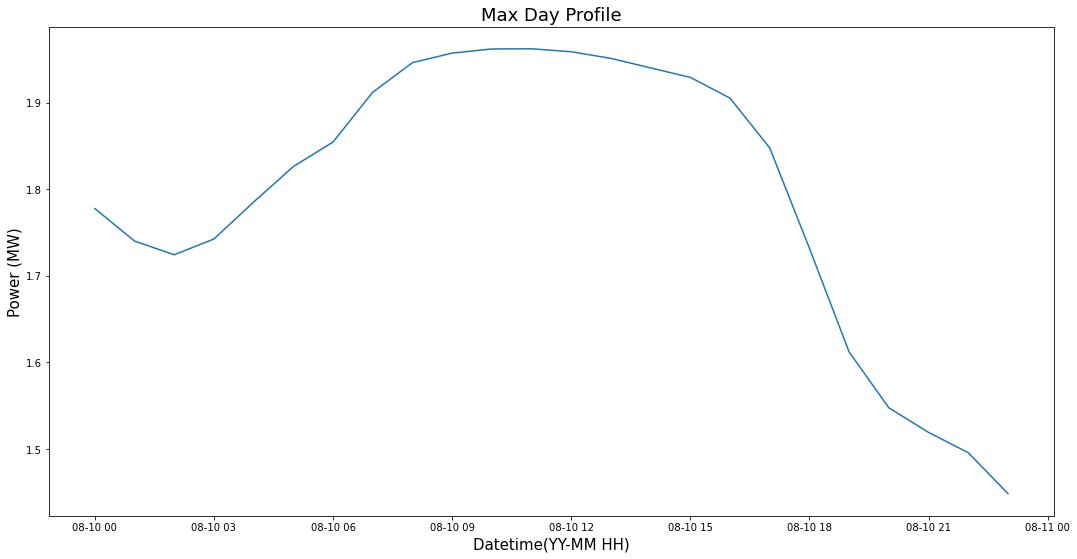

In [47]:
# print maximum daily profile

df_max_day = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-08-10 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-08-11 00:00:00'))].reset_index()
df_max_day = df_max_day[["Datetime", "Power (MW)"]]

plt.figure(figsize=(18,9))
plt.plot(df_max_day['Datetime'],df_max_day['Power (MW)'])
plt.xlabel('Datetime(YY-MM HH)',fontsize=15)
plt.ylabel('Power (MW)',fontsize=15)
plt.title('Max Day Profile',fontsize=18)
plt.show()
